In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### requirements

In [ ]:
!pip install mpl_finance

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *
# import matplotlib.pyplot as plt

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf

import pickle

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### load data

In [ ]:
# interval = '30m'
interval = '1m'

date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx']
['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xls

### basic_func

In [ ]:
def sync_check(df, second_df, third_df, fourth_df, fifth_df):

    #           supertrend          #
    ha_second_df = heikinashi(second_df)
    # ha_third_df = heikinashi(third_df)
    # print(ha_second_df.tail(10))
    # quit()

    second_df['minor_ST1_Up'], second_df['minor_ST1_Down'], second_df['minor_ST1_Trend'] = supertrend(second_df, 10, 2)
    second_df['minor_ST2_Up'], second_df['minor_ST2_Down'], second_df['minor_ST2_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2)
    second_df['minor_ST3_Up'], second_df['minor_ST3_Down'], second_df['minor_ST3_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2.5)
    # print(df.head(20))
    # quit()

    # startTime = time.time()

    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [i for i in range(-9, 0, 1)]),
                              columns=['minor_ST1_Up', 'minor_ST1_Down', 'minor_ST1_Trend'
                                  , 'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST2_Trend'
                                  , 'minor_ST3_Up', 'minor_ST3_Down', 'minor_ST3_Trend']))

    # print(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]].tail())
    # min_upper = np.minimum(df["minor_ST1_Up"], df["minor_ST2_Up"], df["minor_ST3_Up"])
    # max_lower = np.maximum(df["minor_ST1_Down"], df["minor_ST2_Down"], df["minor_ST3_Down"])
    min_upper = np.min(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1)
    max_lower = np.max(df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1)

    df['middle_line'] = (min_upper + max_lower) / 2

    print("supertrend phase done")


    #           lucid sar              #
    df['sar1'] = lucid_sar(df)

    second_df['sar'] = lucid_sar(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['sar2']))

    third_df['sar'] = lucid_sar(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['sar3']))

    fourth_df['sar'] = lucid_sar(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['sar4']))

    fifth_df['sar'] = lucid_sar(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['sar5']))

    # print(df[['sar1', 'sar2']].tail(20))
    # print(df[['minor_ST1_Up', 'minor_ST1_Trend']].tail(20))
    # quit()

    print("sar phase done")


    
    #           ichimoku            #
    df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))
    
    third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['senkou_a3', 'senkou_b3']))
    
    fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['senkou_a4', 'senkou_b4']))
    
    fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['senkou_a5', 'senkou_b5']))


    #           1-2. displacement           #
    # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)

    print("cloud phase done")

    
    #           macd            #
    df['macd_hist1'] = macd(df)
    
    second_df['macd_hist'] = macd(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['macd_hist2']))

    third_df['macd_hist'] = macd(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['macd_hist3']))

    fourth_df['macd_hist'] = macd(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['macd_hist4']))

    fifth_df['macd_hist'] = macd(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['macd_hist5']))


    print("macd phase done")


    #         trix        #
    df['trix1'] = trix_hist(df, 14, 1, 5)
    
    second_df['trix'] = trix_hist(second_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['trix2']))

    third_df['trix'] = trix_hist(third_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['trix3']))

    fourth_df['trix'] = trix_hist(fourth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['trix4']))

    fifth_df['trix'] = trix_hist(fifth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['trix5']))

    
    #          add for ep           #
    df['min_upper'] = min_upper
    df['max_lower'] = max_lower
  

    return df


### make & save res_df

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'


for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue
  
  # if 'btc'.upper() not in file_list[i]:
  #   continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-05-30'.upper() not in file_list[i]:
  if '2021-06-30'.upper() not in file_list[i]:
  # if '2021-07-03'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
    continue

  

  # if 'eth'.upper() in file_list[i]:
  # # if '2021-07-03'.upper() not in file_list[i]:
  # # if '2021-07-01'.upper() not in file_list[i]:
  #   continue

  for key in keys:  
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)

    print(df.index[:2])
    print(second_df.index[:2])
    print(third_df.index[:2])
    print(fourth_df.index[:2])
    print(fifth_df.index[:2])

    res_df = sync_check(df, second_df, third_df, fourth_df, fifth_df)


    res_df.to_excel(save_path + key.replace(".xlsx", "_trix_backi2.xlsx"))
    print("res_df saved succesfully !")

### load res_df

In [ ]:
save_path = './candlestick_concated/res_df/'

# key = '2021-07-03 ETHUSDT.xlsx'
# key = '2021-07-01 ETHUSDT.xlsx'
key = '2021-07-01 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 BTCUSDT_backi2.xlsx'
# key = '2021-06-30 XRPUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi1.xlsx'
res_df = pd.read_excel(save_path + key, index_col=0)

### sync check

In [ ]:
plot_size = 300


#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols



#         do plot       #
plot_df = res_df.iloc[-plot_size:, input_cols]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

temp_ohlc = plot_df.values[:, :4]
index = np.arange(len(temp_ohlc))
candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

# print(plot_df.values[:, 4:])
plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)



plt.show()
# plt.draw()
plt.close()
# plt.pause(1e-3)

### pr check with strategy

#### basic strategy

In [ ]:
org_res_df = res_df.copy()

##### shifting

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


##### tp 2 case non_inversion

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.00005
# gap = 0.0008


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue
  
  if "trix" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  # res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")
  break


upper_middle = (res_df['middle_line'] + res_df['min_upper']) / 2
lower_middle = (res_df['middle_line'] + res_df['max_lower']) / 2

upper_ep = upper_middle * (1 - gap)
lower_ep = lower_middle * (1 + gap)


# -------------------- 진입이 체결된 후의 모습을 묘사해야함 -------------------- #

#       short = -1      #
entry = np.where((res_df['close'].shift(1) < upper_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['high'] >= upper_ep)   # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                   , -1, 0) 
                  #  , 1, 0) 

# entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
#                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
#                   (res_df['minor_ST2_Trend'] == 1) & 
#                   (res_df['minor_ST3_Trend'] == 1)), -1, 0)   

#       long = 1     #
#       close.shift(1) > ep | 2nd_middle line       #

entry = np.where((res_df['close'].shift(1) > lower_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['low'] <= lower_ep)    # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                   , 1, entry) 
                  #  , -1, entry) 

# entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
#                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
#                   (res_df['minor_ST2_Trend'] == -1) & 
#                   (res_df['minor_ST3_Trend'] == -1)), 1, entry) 


#       1-2. tp line = middle line 조금 이내         #
short_tp = res_df['middle_line'] * (1 + gap)
long_tp = res_df['middle_line'] * (1 - gap)

# short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
# long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

# print("short_tp.iloc[-10:] :", short_tp.iloc[-10:])
# break


#       trading       #
trade_list = []
pr_list = []
ep_tp_list = []
tp_state_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):

      if res_df['low'].iloc[j] <= short_tp.iloc[j]:
      # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

        #         dynamic tp        #
        if short_tp.iloc[j] != short_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            # tp = short_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-short_tp")

        #         static tp         #
        else:
          
          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

        temp_pr = upper_ep.iloc[i] / tp - fee
        ep_tp_list.append((upper_ep.iloc[i], tp))                          
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      #     1. 결과적으로는 tp 를 넘었는데    #
      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        #         dynamic tp        #
        if long_tp.iloc[j] != long_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            # tp = long_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-long_tp")

        #         static tp         #
        else:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")


        temp_pr = tp / lower_ep.iloc[i] - fee
        ep_tp_list.append((lower_ep.iloc[i], tp))
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



# -------------------- result analysis -------------------- #

plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
plt.show()

# break

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #

###### cut

2021-06-30 ETHUSDT_trix_backi2.xlsx loaded !


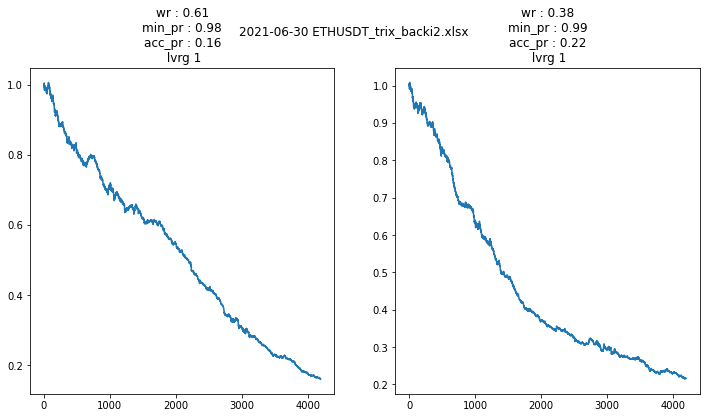

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.00005
# gap = 0.0008


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue
  
  if "trix" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  # res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")
  break


upper_middle = (res_df['middle_line'] + res_df['min_upper']) / 2
lower_middle = (res_df['middle_line'] + res_df['max_lower']) / 2

upper_ep = upper_middle * (1 - gap)
lower_ep = lower_middle * (1 + gap)


# -------------------- 진입이 체결된 후의 모습을 묘사해야함 -------------------- #

#       short = -1      #
entry = np.where((res_df['close'].shift(1) < upper_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['high'] >= upper_ep)   # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                   , -1, 0) 
                  #  , 1, 0) 

# entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
#                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
#                   (res_df['minor_ST2_Trend'] == 1) & 
#                   (res_df['minor_ST3_Trend'] == 1)), -1, 0)   

#       long = 1     #
#       close.shift(1) > ep | 2nd_middle line       #

entry = np.where((res_df['close'].shift(1) > lower_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['low'] <= lower_ep)    # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                   , 1, entry) 
                  #  , -1, entry) 

# entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
#                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
#                   (res_df['minor_ST2_Trend'] == -1) & 
#                   (res_df['minor_ST3_Trend'] == -1)), 1, entry) 


#       1-2. tp line = middle line 조금 이내         #
short_tp = res_df['middle_line'] * (1 + gap)
long_tp = res_df['middle_line'] * (1 - gap)

# short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
# long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

# print("short_tp.iloc[-10:] :", short_tp.iloc[-10:])
# break


#       trading       #
trade_list = []
pr_list = []
ep_tp_list = []
tp_state_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):


      #               cut             #
      if res_df['close'].iloc[j] > res_df['min_upper'].iloc[j]:

        tp = res_df['close'].iloc[j]
        # tp = res_df['min_upper'].iloc[j]
        tp_state_list.append("close cut")

        temp_pr = upper_ep.iloc[i] / tp - fee
        ep_tp_list.append((upper_ep.iloc[i], tp))                          
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break


      if res_df['low'].iloc[j] <= short_tp.iloc[j]:
      # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

        #         dynamic tp        #
        if short_tp.iloc[j] != short_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            # tp = short_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-short_tp")

        #         static tp         #
        else:
          
          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

        temp_pr = upper_ep.iloc[i] / tp - fee
        ep_tp_list.append((upper_ep.iloc[i], tp))                          
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      #               cut             #
      if res_df['close'].iloc[j] < res_df['max_lower'].iloc[j]:

        tp = res_df['close'].iloc[j]
        tp_state_list.append("close cut")

        temp_pr = tp / lower_ep.iloc[i] - fee
        ep_tp_list.append((lower_ep.iloc[i], tp))
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break

      #     1. 결과적으로는 tp 를 넘었는데    #
      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        #         dynamic tp        #
        if long_tp.iloc[j] != long_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            # tp = long_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-long_tp")

        #         static tp         #
        else:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")


        temp_pr = tp / lower_ep.iloc[i] - fee
        ep_tp_list.append((lower_ep.iloc[i], tp))
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



# -------------------- result analysis -------------------- #

plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
plt.show()

# break

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #

##### st alignment >= 3

2021-06-30 ETHUSDT_trix_backi2.xlsx loaded !


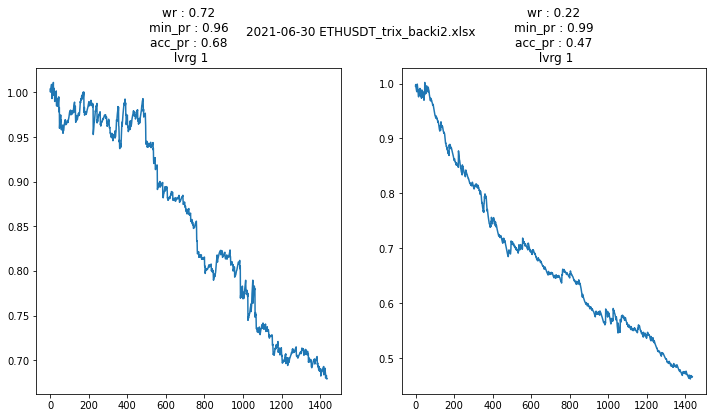

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
# gap = 0.0008


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "trix_backi2" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")
  break


upper_middle = (res_df['middle_line'] + res_df['min_upper']) / 2
lower_middle = (res_df['middle_line'] + res_df['max_lower']) / 2

upper_ep = upper_middle * (1 - gap)
lower_ep = lower_middle * (1 + gap)


#       short = -1      #
entry = np.where((res_df['close'].shift(1) < upper_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['high'] >= upper_ep) &   # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                  (res_df['minor_ST1_Trend'] == -1) & 
                  (res_df['minor_ST2_Trend'] == -1) &
                  (res_df['minor_ST3_Trend'] == -1)
                  # )
                   , -1, 0) 
                  #  , 1, 0) 

#       long = 1     #
#       close.shift(1) > ep | 2nd_middle line       #

entry = np.where((res_df['close'].shift(1) > lower_ep) & 
                  # (lower_ep <= res_df['high']) & 
                  (res_df['low'] <= lower_ep) &    # <-- 이것만 있어도 되지 않을까함
                  #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  # (res_df['minor_ST2_Trend'] == -1) & 
                  # (res_df['minor_ST3_Trend'] == -1))
                  (res_df['minor_ST1_Trend'] == 1) & 
                  (res_df['minor_ST2_Trend'] == 1) &
                  (res_df['minor_ST3_Trend'] == 1)
                  # )
                   , 1, entry) 
                  #  , -1, entry) 


#       short = -1      #
#       second 는 color off 되면 안댐, second on = third on     #
# entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
#                   #  np.logical_not(
#                   (res_df['minor_ST1_Trend'] == -1) & 
#                   (res_df['minor_ST2_Trend'] == -1) &
#                   (res_df['minor_ST3_Trend'] == -1)
#                   # )
#                    , -1, 0)   

#       long = 1     #
# entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
#                   #  np.logical_not(
#                   (res_df['minor_ST1_Trend'] == 1) & 
#                   (res_df['minor_ST2_Trend'] == 1) &
#                   (res_df['minor_ST3_Trend'] == 1)
#                   # )
#                    , 1, entry) 


#       1-2. tp line = middle line 조금 이내         #
short_tp = res_df['middle_line'] * (1 + gap)
long_tp = res_df['middle_line'] * (1 - gap)

# short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
# long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

# print("short_tp.iloc[-10:] :", short_tp.iloc[-10:])
# break


#       trading       #
trade_list = []
pr_list = []
ep_tp_list = []
tp_state_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):

      if res_df['low'].iloc[j] <= short_tp.iloc[j]:
      # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

        #         dynamic tp        #
        if short_tp.iloc[j] != short_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            # tp = short_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-short_tp")

        #         static tp         #
        else:
          
          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] < short_tp.iloc[j]:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:

            tp = short_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-short_tp")

        temp_pr = upper_ep.iloc[i] / tp - fee
        ep_tp_list.append((upper_ep.iloc[i], tp))                          
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      #     1. 결과적으로는 tp 를 넘었는데    #
      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        #         dynamic tp        #
        if long_tp.iloc[j] != long_tp.iloc[j - 1]:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            # tp = long_tp.iloc[j]
            tp = res_df['open'].iloc[j]
            tp_state_list.append("d-open")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("d-long_tp")

        #         static tp         #
        else:

          #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #   non_inversion 의 경우, short_tp 가 가능함   #

          if res_df['open'].iloc[j] >= long_tp.iloc[j]:

            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")

          
          #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          else:
            
            tp = long_tp.iloc[j]
            # tp = res_df['open'].iloc[j]
            tp_state_list.append("s-long_tp")


        temp_pr = tp / lower_ep.iloc[i] - fee
        ep_tp_list.append((lower_ep.iloc[i], tp))
        trade_list.append([i, j])
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



# -------------------- result analysis -------------------- #

plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
plt.show()

# break

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #

##### tp 2 case inversion

2021-06-30 XLMUSDT_backi2.xlsx loaded !


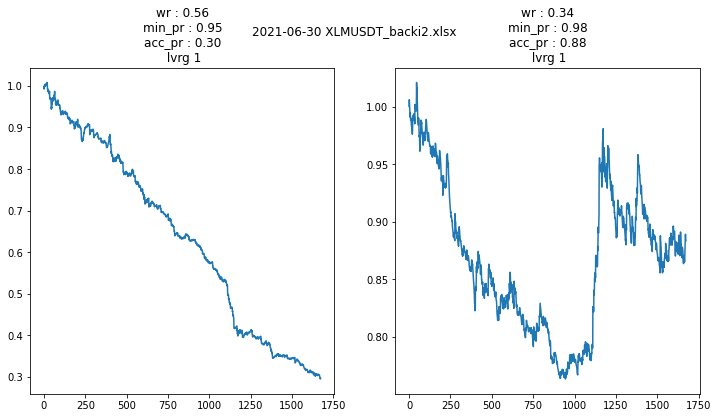

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
# gap = 0.0008


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")
  # break

  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)

  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
  #                                                     (res_df['minor_ST2_Trend'] == 1) & 
  #                                                   (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
  # #       long = 1     #
  # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
  #                                                     (res_df['minor_ST2_Trend'] == -1) & 
  #                                                   (res_df['minor_ST3_Trend'] == -1)), 1, entry)   

  entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)), 1, entry) 


  #       1-2. tp line = middle line 조금 이내         #
  # short_tp = res_df['middle_line'] * (1 + gap)
  # long_tp = res_df['middle_line'] * (1 - gap)

  short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
  long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

  # print("short_tp.iloc[-10:] :", short_tp.iloc[-10:])
  # break


  #       trading       #
  trade_list = []
  pr_list = []
  ep_tp_list = []
  tp_state_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:
        # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

          #         dynamic tp        #
          if short_tp.iloc[j] != short_tp.iloc[j - 1]:

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] < short_tp.iloc[j]:

              # tp = short_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              # tp = res_df['close'].iloc[j]

              tp_state_list.append("d-open")

            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:

              # tp = short_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp = res_df['close'].iloc[j]
              tp_state_list.append("d-close")

          #         static tp         #
          else:
            
            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            #   non_inversion 의 경우, short_tp 가 가능함   #

            if res_df['open'].iloc[j] < short_tp.iloc[j]:

              # tp = short_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("s-open")

            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:

              # tp = short_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp = res_df['close'].iloc[j]
              tp_state_list.append("s-close")

          temp_pr = upper_ep.iloc[i] / tp - fee
          ep_tp_list.append((upper_ep.iloc[i], tp))                          
          trade_list.append([i, j])
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        #     1. 결과적으로는 tp 를 넘었는데    #
        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          #         dynamic tp        #
          if long_tp.iloc[j] != long_tp.iloc[j - 1]:

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] >= long_tp.iloc[j]:

              # tp = long_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              # tp = res_df['close'].iloc[j]

              tp_state_list.append("d-open")

            
            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:
              
              # tp = long_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp = res_df['close'].iloc[j]
              tp_state_list.append("d-close")

          #         static tp         #
          else:

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            #   non_inversion 의 경우, short_tp 가 가능함   #

            if res_df['open'].iloc[j] >= long_tp.iloc[j]:

              # tp = long_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("s-open")

            
            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:
              
              # tp = long_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp = res_df['close'].iloc[j]
              tp_state_list.append("s-close")


          temp_pr = tp / lower_ep.iloc[i] - fee
          ep_tp_list.append((lower_ep.iloc[i], tp))
          trade_list.append([i, j])
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  # -------------------- result analysis -------------------- #

  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
  plt.show()

  # break

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

#### confluence

###### cloud lb + macd

2021-06-30 ETHUSDTmacd5355_backi2.xlsx loaded !


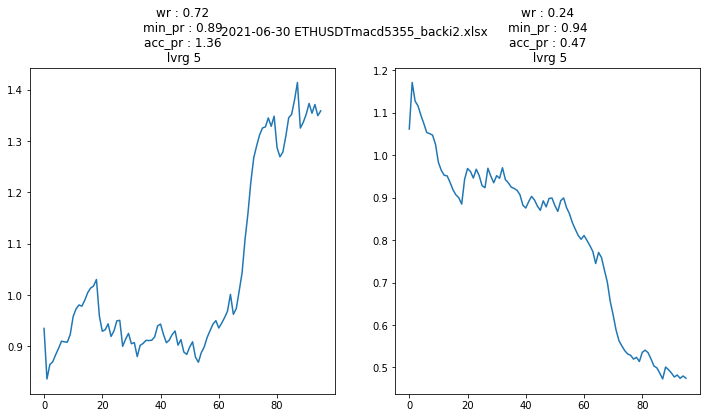

In [ ]:
fee = 0.0004
lvrg = 5


macd_shift_size = 1


# cloud_shift_size = -1
# cloud_shift_size = 15
cloud_shift_size = 1
# cloud_shift_size = 0

cloud_lookback = 50
# cloud_lookback = 70
# cloud_lookback = 150
# cloud_lookback = 100


#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

macd_hist = 'macd_hist1'

save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  if "eth".upper() not in key:
    continue

  if "backi2" not in key:
    continue

  if "macd" not in key:
    continue


  # res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

    
    cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
    cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)
    
    upper_ep = res_df['min_upper'] * (1 - gap)
    lower_ep = res_df['max_lower'] * (1 + gap)


    under_top = upper_ep <= cloud_top.shift(cloud_shift_size)
    over_bottom = lower_ep >= cloud_bottom.shift(cloud_shift_size)
    # print("under_top :", under_top)
    # break


    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(macd_shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(macd_shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(macd_shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(macd_shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)
    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2



    #       trading       #
    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if i < cloud_lookback:
        i += 1
        if i >= len(res_df):
          break
        continue

      if entry[i] == -1:

        #     check cloud constraints   #      
        if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # if np.sum(under_top.iloc[i - cloud_lookback:i]) != cloud_lookback:
          i += 1
          if i >= len(res_df):
            break
          continue  
        # else:
        #   print("np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) :", under_top.iloc[i + 1 - cloud_lookback:i + 1])     


        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # if np.sum(over_bottom.iloc[i - cloud_lookback:i]) != cloud_lookback:
          i += 1
          if i >= len(res_df):
            break
          continue  

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

#### ichimoku

##### ep lookback < cloud

2021-06-30 ETHUSDT_trix_backi2.xlsx loaded !


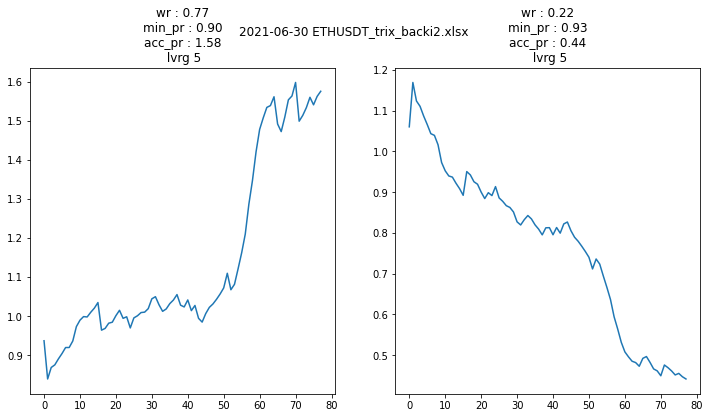

2021-06-30 BTCUSDT_trix_backi2.xlsx loaded !


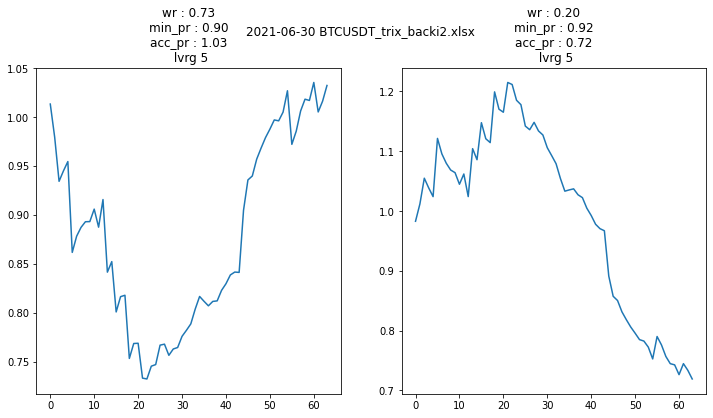

2021-06-30 BCHUSDT_trix_backi2.xlsx loaded !


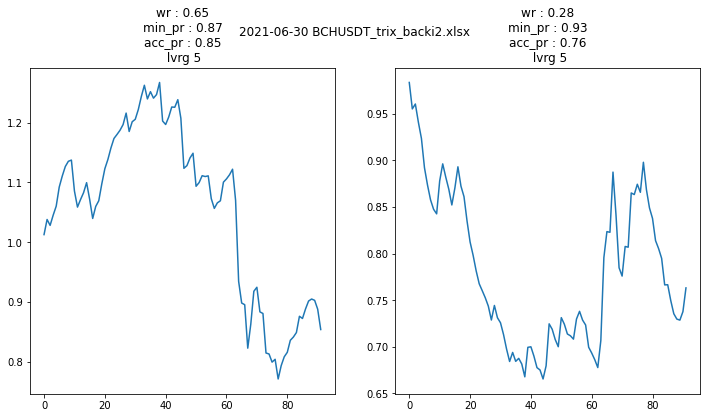

2021-06-30 XRPUSDT_trix_backi2.xlsx loaded !


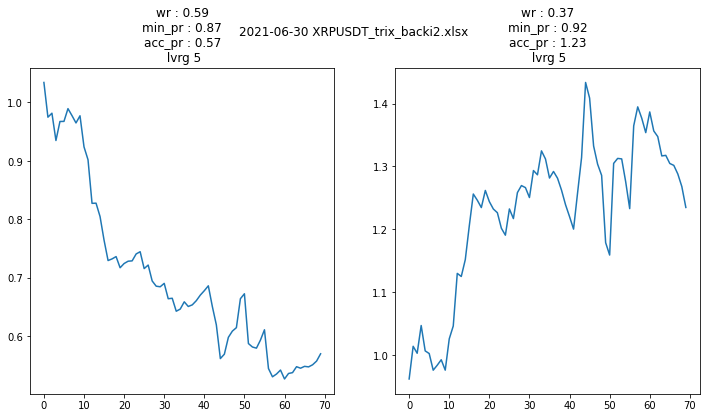

2021-06-30 EOSUSDT_trix_backi2.xlsx loaded !


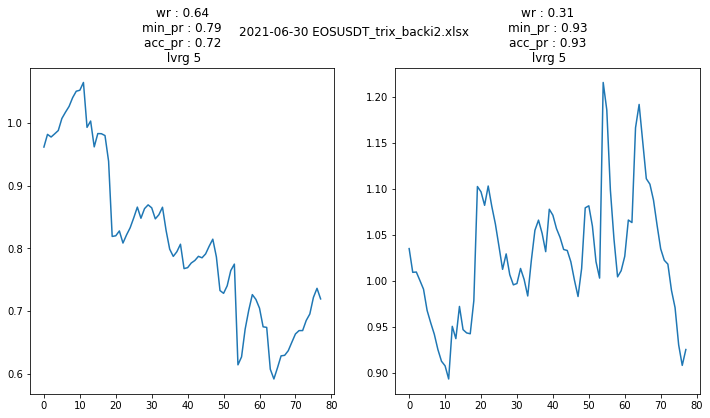

2021-06-30 LTCUSDT_trix_backi2.xlsx loaded !


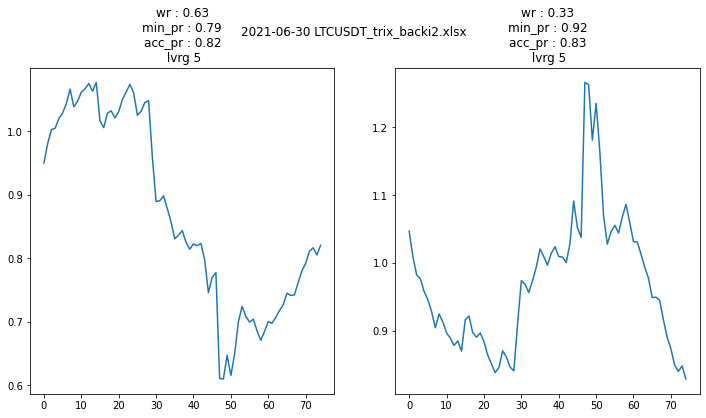

2021-06-30 ETCUSDT_trix_backi2.xlsx loaded !


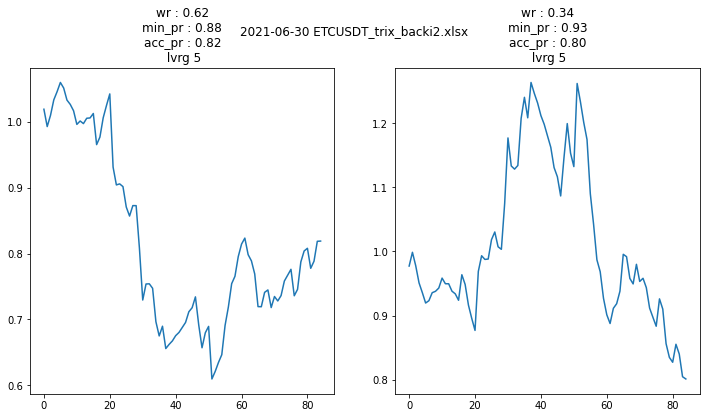

2021-06-30 LINKUSDT_trix_backi2.xlsx loaded !


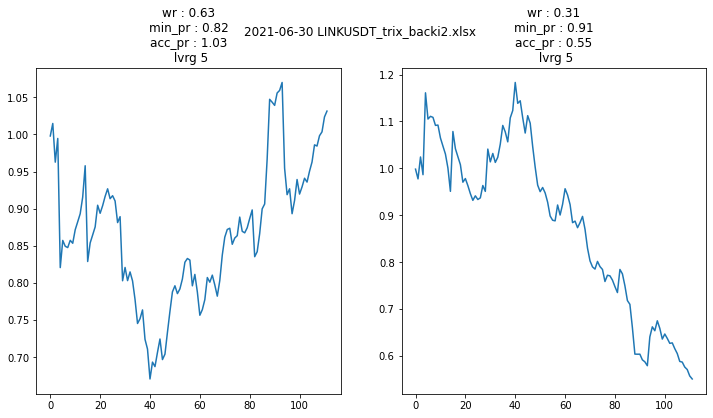

2021-06-30 XLMUSDT_trix_backi2.xlsx loaded !


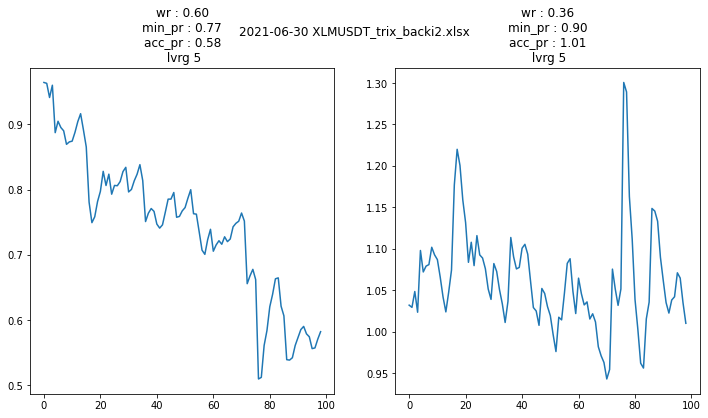

2021-06-30 ADAUSDT_trix_backi2.xlsx loaded !


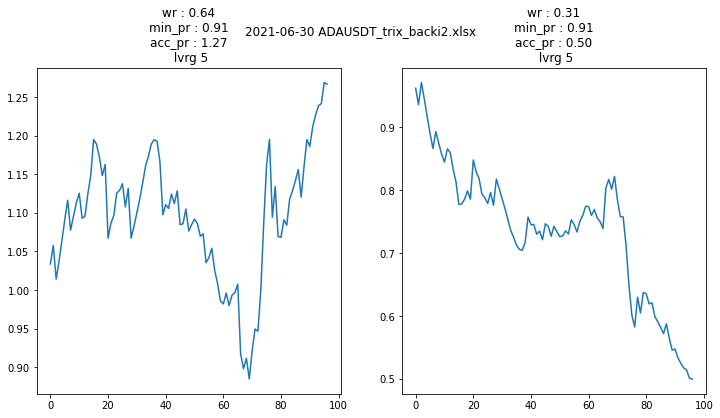

In [ ]:
fee = 0.0004
lvrg = 5

# cloud_shift_size = -1
# cloud_shift_size = 15
cloud_shift_size = 1
# cloud_shift_size = 0

cloud_lookback = 50
# cloud_lookback = 70
# cloud_lookback = 150
# cloud_lookback = 100


#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
gap = 0.0001
gap = 0.00005
# gap = 0.0000
# gap = -0.00005


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "eth".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue

  if "trix" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

    
    cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
    cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)
    
    upper_ep = res_df['min_upper'] * (1 - gap)
    lower_ep = res_df['max_lower'] * (1 + gap)


    under_top = upper_ep <= cloud_top.shift(cloud_shift_size)
    over_bottom = lower_ep >= cloud_bottom.shift(cloud_shift_size)
    # print("under_top :", under_top)
    # break



    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    
    #       short = -1      #
    entry = np.where((res_df['close'].shift(1) < upper_ep) & 
                      # (lower_ep <= res_df['high']) & 
                      (res_df['high'] >= upper_ep)   # <-- 이것만 있어도 되지 않을까함
                      #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                      # (res_df['minor_ST2_Trend'] == -1) & 
                      # (res_df['minor_ST3_Trend'] == -1))
                      , -1, 0) 
                      #  , 1, 0) 

    # entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
    #                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                   (res_df['minor_ST2_Trend'] == 1) & 
    #                   (res_df['minor_ST3_Trend'] == 1)), -1, 0)   

    #       long = 1     #
    #       close.shift(1) > ep | 2nd_middle line       #

    entry = np.where((res_df['close'].shift(1) > lower_ep) & 
                      # (lower_ep <= res_df['high']) & 
                      (res_df['low'] <= lower_ep)    # <-- 이것만 있어도 되지 않을까함
                      #  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                      # (res_df['minor_ST2_Trend'] == -1) & 
                      # (res_df['minor_ST3_Trend'] == -1))
                      , 1, entry) 
                      #  , -1, entry) 


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)
    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2



    #       trading       #
    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if i < cloud_lookback:
        i += 1
        if i >= len(res_df):
          break
        continue

      if entry[i] == -1:

        #     check cloud constraints   #      
        if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # if np.sum(under_top.iloc[i - cloud_lookback:i]) != cloud_lookback:
          i += 1
          if i >= len(res_df):
            break
          continue  
        # else:
        #   print("np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) :", under_top.iloc[i + 1 - cloud_lookback:i + 1])     


        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # if np.sum(over_bottom.iloc[i - cloud_lookback:i]) != cloud_lookback:
          i += 1
          if i >= len(res_df):
            break
          continue  

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

##### close < cloud

In [ ]:
fee = 0.0004
lvrg = 1

# cloud_shift_size = -1
# cloud_shift_size = 15
cloud_shift_size = 0
# cloud_shift_size = 1Z

# close_shift_size = 1
close_shift_size = 0
close_shift_size = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
# gap = -0.001
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

  
  cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
  cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)


  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  
  # entry = np.where((res_df['high'] >= upper_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
  #                 (res_df['minor_ST2_Trend'] == 1) & 
  #                 (res_df['minor_ST3_Trend'] == 1)) &
  #                 (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
  # #       long = 1     #
  # entry = np.where((res_df['low'] <= lower_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
  #                 (res_df['minor_ST2_Trend'] == -1) & 
  #                 (res_df['minor_ST3_Trend'] == -1)) &
  #                 (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)  
  
  entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                  (res_df['minor_ST2_Trend'] == 1) & 
                  (res_df['minor_ST3_Trend'] == 1)) &
                  (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
                  # (upper_ep < cloud_top.shift(cloud_shift_size)), -1, 0)   

  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  (res_df['minor_ST2_Trend'] == -1) & 
                  (res_df['minor_ST3_Trend'] == -1)) &
                  (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)   
                  # (lower_ep > cloud_bottom.shift(cloud_shift_size)), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = res_df['close'].iloc[i] / short_tp.iloc[j] - fee
          # temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / res_df['close'].iloc[i] - fee
          # temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
  plt.show()

  break

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

##### ep < cloud

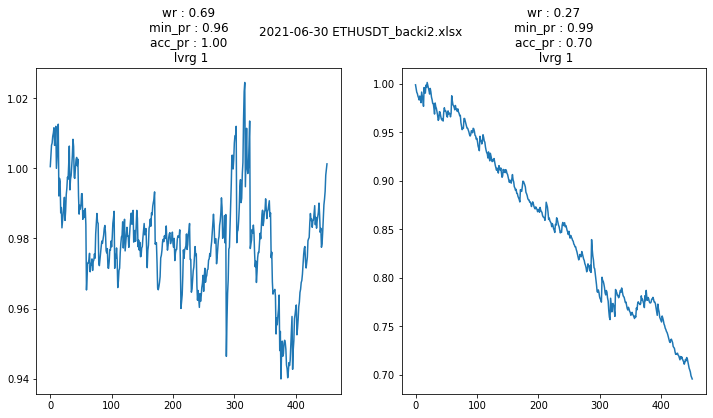

In [ ]:
fee = 0.0004
lvrg = 1

# cloud_shift_size = -1
# cloud_shift_size = 15
cloud_shift_size = 0
cloud_shift_size = 1
cloud_shift_size = 5
# cloud_shift_size = 15


#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
# gap = -0.001
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

  
  cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
  cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)


  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  
  # entry = np.where((res_df['high'] >= upper_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
  #                 (res_df['minor_ST2_Trend'] == 1) & 
  #                 (res_df['minor_ST3_Trend'] == 1)) &
  #                 (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
  # #       long = 1     #
  # entry = np.where((res_df['low'] <= lower_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
  #                 (res_df['minor_ST2_Trend'] == -1) & 
  #                 (res_df['minor_ST3_Trend'] == -1)) &
  #                 (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)  
  
  entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                  (res_df['minor_ST2_Trend'] == 1) & 
                  (res_df['minor_ST3_Trend'] == 1)) &
                  # (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
                  (upper_ep < cloud_top.shift(cloud_shift_size)), -1, 0)   

  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  (res_df['minor_ST2_Trend'] == -1) & 
                  (res_df['minor_ST3_Trend'] == -1)) &
                  # (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)   
                  (lower_ep > cloud_bottom.shift(cloud_shift_size)), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = res_df['close'].iloc[i] / short_tp.iloc[j] - fee
          # temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break

    elif entry[i] == 1:

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / res_df['close'].iloc[i] - fee
          # temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break


  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
  plt.show()

  break

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

##### ichimoku cut

In [ ]:
fee = 0.0004
lvrg = 1

# cloud_shift_size = -1
# cloud_shift_size = 15
cloud_shift_size = 0

cloud_lookback = 5

# close_shift_size = 1
# close_shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']


for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

  
  cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
  cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)

  under_top = upper_ep <= cloud_top
  over_bottom = lower_ep >= cloud_bottom
  # print("under_top :", under_top)
  # break



  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  
  # entry = np.where((res_df['high'] >= upper_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
  #                 (res_df['minor_ST2_Trend'] == 1) & 
  #                 (res_df['minor_ST3_Trend'] == 1)) &
  #                 (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
  # #       long = 1     #
  # entry = np.where((res_df['low'] <= lower_ep) & 
  #                  np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
  #                 (res_df['minor_ST2_Trend'] == -1) & 
  #                 (res_df['minor_ST3_Trend'] == -1)) &
  #                 (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)  
  
  entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                  (res_df['minor_ST2_Trend'] == 1) & 
                  (res_df['minor_ST3_Trend'] == 1)) &
                  1, -1, 0)   
                   
                  # (res_df['close'].shift(close_shift_size) < cloud_top.shift(cloud_shift_size)), -1, 0)   
                  # (upper_ep < cloud_top.shift(cloud_shift_size)), -1, 0)   

  #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  (res_df['minor_ST2_Trend'] == -1) & 
                  (res_df['minor_ST3_Trend'] == -1)) &
                  1, 1, entry)   
                   
                  # (res_df['close'].shift(close_shift_size) > cloud_bottom.shift(cloud_shift_size)), 1, entry)   
                  # (lower_ep > cloud_bottom.shift(cloud_shift_size)), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if i < cloud_lookback:
      i += 1
      if i >= len(res_df):
        break
      continue

    if entry[i] == -1:

      #     check cloud constraints   #      
      if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        i += 1
        if i >= len(res_df):
          break
        continue  
      # else:
      #   print("np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) :", under_top.iloc[i + 1 - cloud_lookback:i + 1])     

      for j in range(i + 1, len(res_df)):

        if res_df['low'].iloc[j] <= short_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break
        
        
        #     여기서, cut 조건 확인     #
        if res_df['close'].iloc[j] > cloud_top.iloc[j]:

          trade_list.append([i, j])
          temp_pr = upper_ep.iloc[i] / res_df['close'].iloc[j] - fee
          pr_list.append(temp_pr)
          i = j
          break



    elif entry[i] == 1:

      if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        i += 1
        if i >= len(res_df):
          break
        continue  

      for j in range(i + 1, len(res_df)):

        if res_df['high'].iloc[j] >= long_tp.iloc[j]:

          trade_list.append([i, j])
          temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break

        #     여기서, cut 조건 확인     #
        if res_df['close'].iloc[j] < cloud_bottom.iloc[j]:

          trade_list.append([i, j])
          temp_pr = res_df['close'].iloc[j] / lower_ep.iloc[i] - fee
          pr_list.append(temp_pr)
          i = j
          break


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("rev_wr : %.2f" % rev_wr)
  plt.show()

  break

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

##### close cut

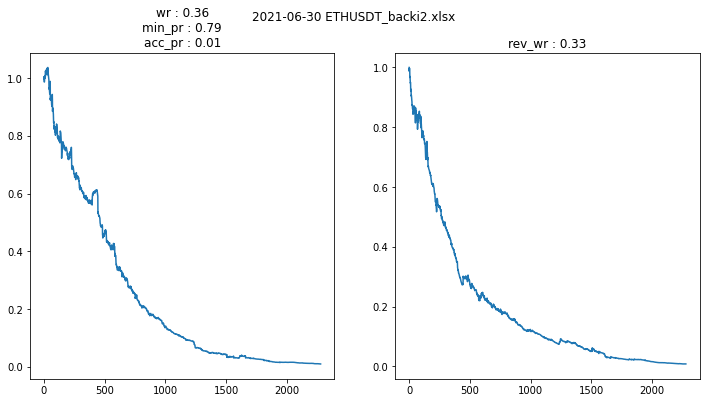

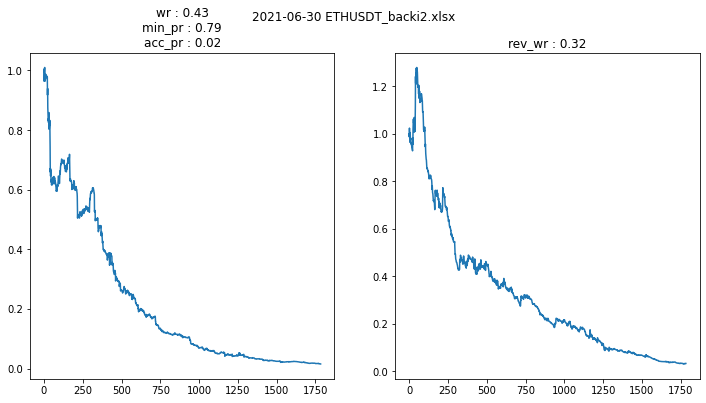

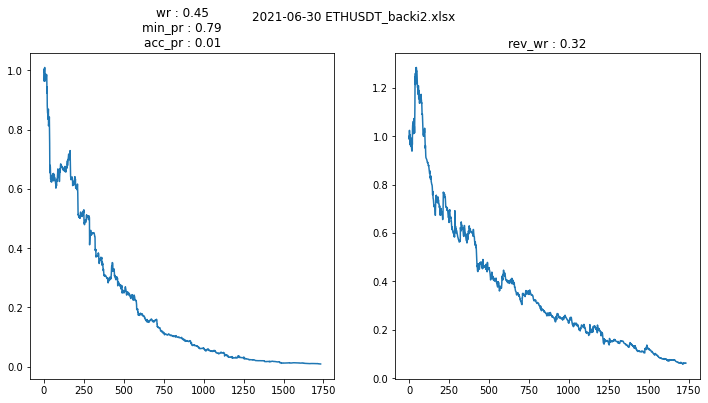

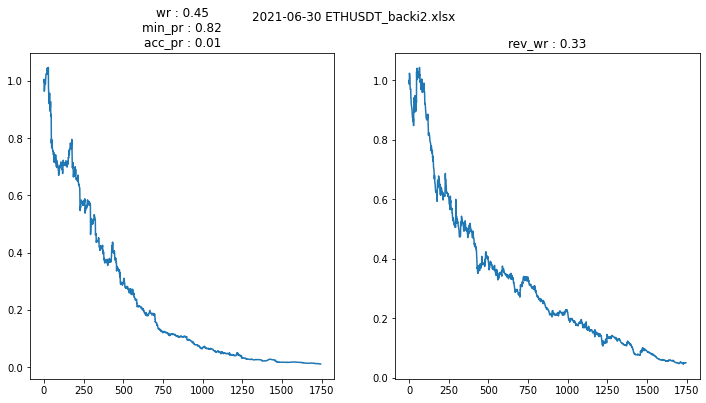

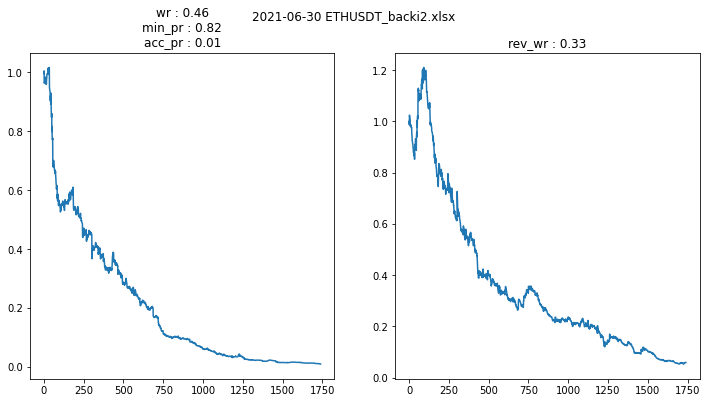

In [ ]:
fee = 0.0004
lvrg = 5

# shift_size = -1
shift_size = 0
close_shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)



senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

for senkou_a, senkou_b in zip(senkoua_list, senkoub_list):

  
  cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
  cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)


  #       1-1. entry condition = ep line touch + all color off 는 제외      #
  #       short = -1     #
  entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                  (res_df['minor_ST2_Trend'] == 1) & 
                  (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
  # #       long = 1     #
  entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                   np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                  (res_df['minor_ST2_Trend'] == -1) & 
                  (res_df['minor_ST3_Trend'] == -1)), 1, entry)   
  
  # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
  #                                                   (res_df['minor_ST2_Trend'] == 1) & 
  #                                                 (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
  # #       long = 1     #
  # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
  #                                                     (res_df['minor_ST2_Trend'] == -1) & 
  #                                                   (res_df['minor_ST3_Trend'] == -1)), 1, entry)   


  #       1-2. tp line = middle line 조금 이내         #
  short_tp = res_df['middle_line'] * (1 + gap)
  long_tp = res_df['middle_line'] * (1 - gap)


  #       trading       #

  trade_list = []
  pr_list = []

  i = 0
  while 1:
  # for i in range(len(res_df)):

    if entry[i] == -1:

      #       check entry cut       #
      if res_df['close'].iloc[i] < cloud_top.iloc[i]:
        
        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      else: # entry cut
        trade_list.append([i, i + 1])
        temp_pr = upper_ep.iloc[i] / res_df['close'].iloc[i] - fee
        pr_list.append(temp_pr)
        i += 1
        

      

    elif entry[i] == 1:

      #       check entry cut       #
      if res_df['close'].iloc[i] > cloud_bottom.iloc[i]:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break

      else: # entry cut
        trade_list.append([i, i + 1])
        temp_pr = res_df['close'].iloc[i] / lower_ep.iloc[i] - fee
        pr_list.append(temp_pr)
        i += 1


    i += 1
    if i >= len(res_df):
      break



  #     result analysis     #
  plt.figure(figsize=(12, 6))
  plt.suptitle(key)

  np_pr = (np.array(pr_list) - 1) * lvrg + 1

  total_pr = np.cumprod(np_pr)
  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

  plt.subplot(121)
  plt.plot(total_pr)
  plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f" % (wr, np.min(np_pr), total_pr[-1]))
  # plt.show()


  #     reversion adjustment      #
  rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
      
  rev_total_pr = np.cumprod(rev_np_pr)
  rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

  plt.subplot(122)
  plt.plot(rev_total_pr)
  plt.title("rev_wr : %.2f" % rev_wr)
  plt.show()

  #   ------------------------------------------------  #

  #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

  #       2-1. sl exit condition = [???]       #

#### macd

##### macd non-inversion

2021-06-30 ETHUSDT_backi2.xlsx loaded !


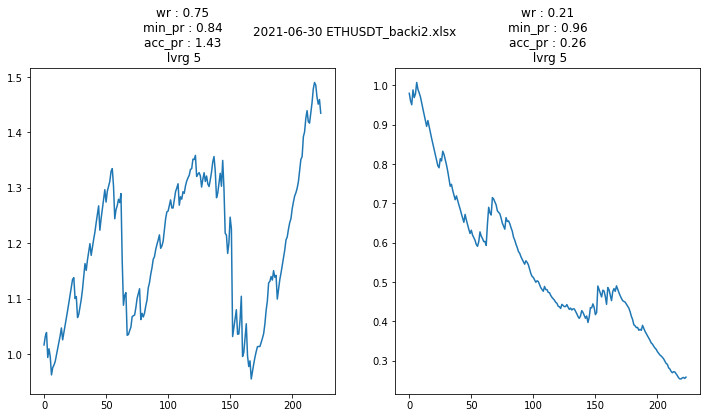

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    # (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    # (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)

    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break


    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #    
    
    


###### ep close

2021-06-30 ETHUSDT_backi2.xlsx loaded !


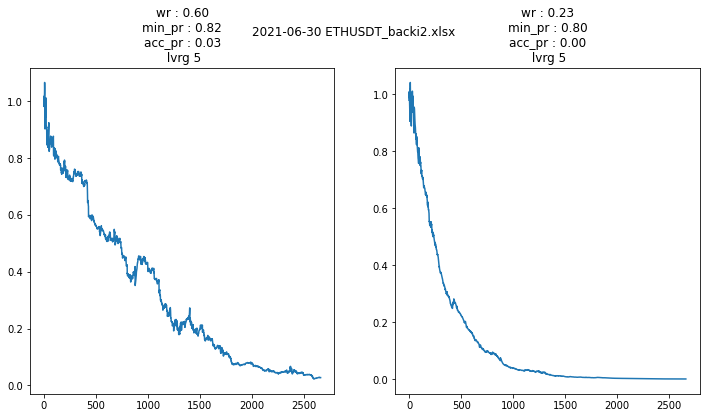

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  # res_df = pd.read_excel(save_path + key, index_col=0)
  
  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    # (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    # (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)

    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            ep = res_df['close'].iloc[i]
            # ep = upper_ep.iloc[i]

            temp_pr = ep / tp - fee
            ep_tp_list.append((ep, tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            ep = res_df['close'].iloc[i]
            # ep = lower_ep.iloc[i]

            temp_pr = tp / ep - fee
            ep_tp_list.append((ep, tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break


    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #    
    
    


##### macd inversion

2021-06-30 XLMUSDT_backi2.xlsx loaded !


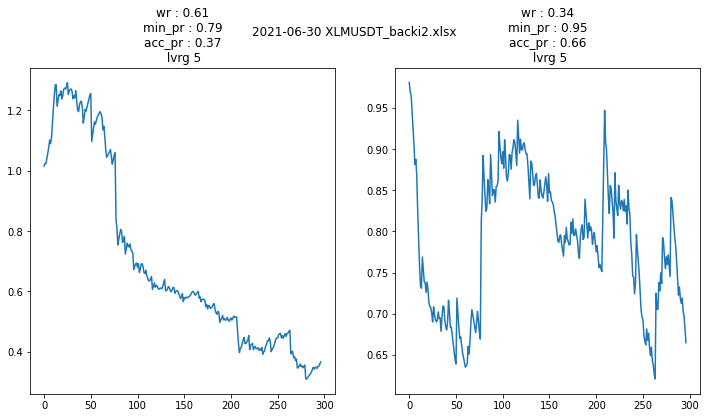

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue

  try:
    res_df
  except:
    res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)

    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] < short_tp.iloc[j]:

              # tp = short_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("open")

            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:

              tp = short_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] >= long_tp.iloc[j]:

              # tp = long_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("open")

            
            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:
              
              tp = long_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("long_tp")

            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #    
    
    


2021-06-30 XLMUSDT_backi2.xlsx loaded !


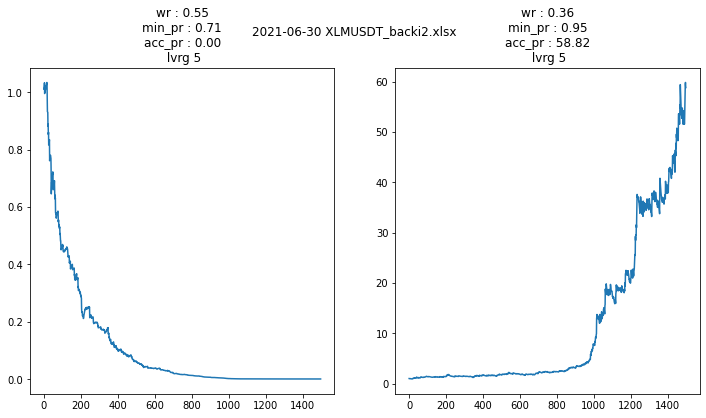

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### ep 2 touch

2021-06-30 ETHUSDT_backi2.xlsx loaded !


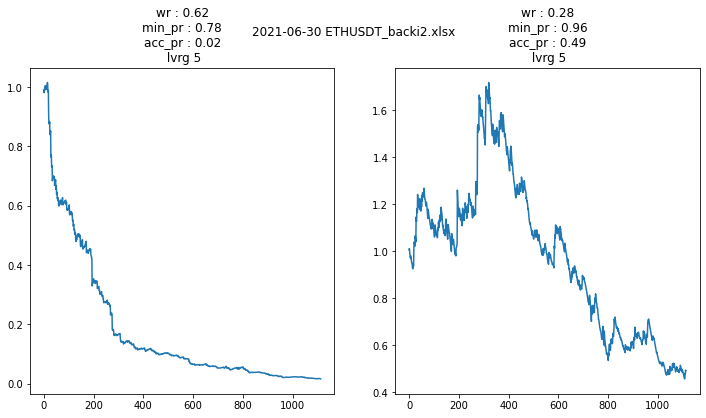

2021-06-30 BTCUSDT_backi2.xlsx loaded !


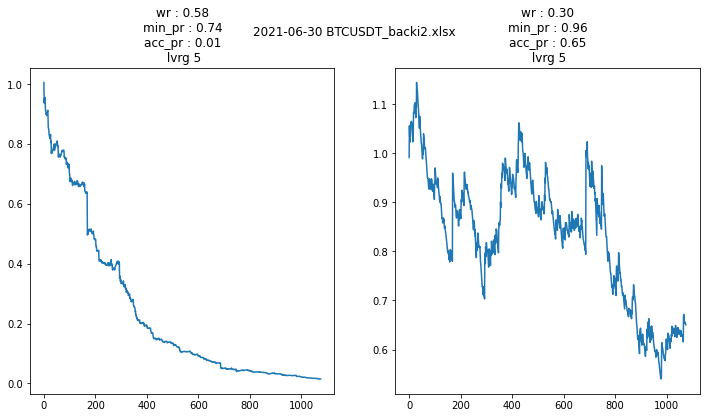

2021-06-30 XRPUSDT_backi2.xlsx loaded !


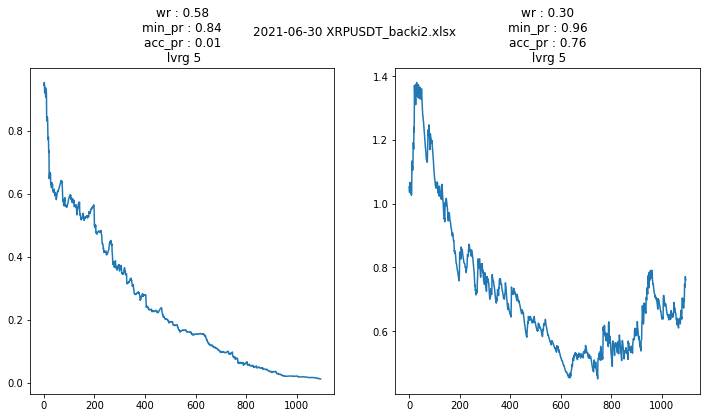

2021-06-30 LINKUSDT_backi2.xlsx loaded !


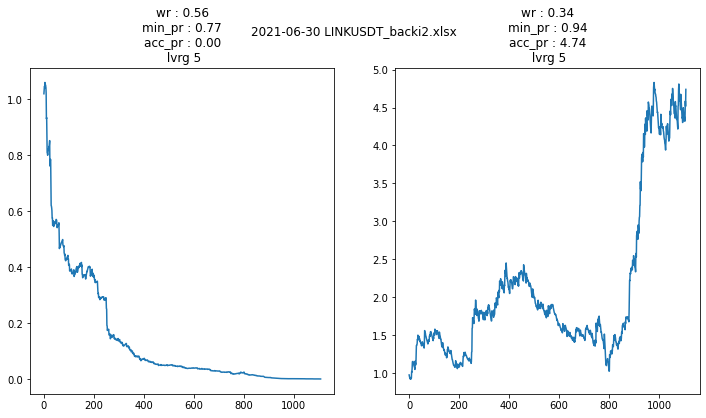

2021-06-30 ADAUSDT_backi2.xlsx loaded !


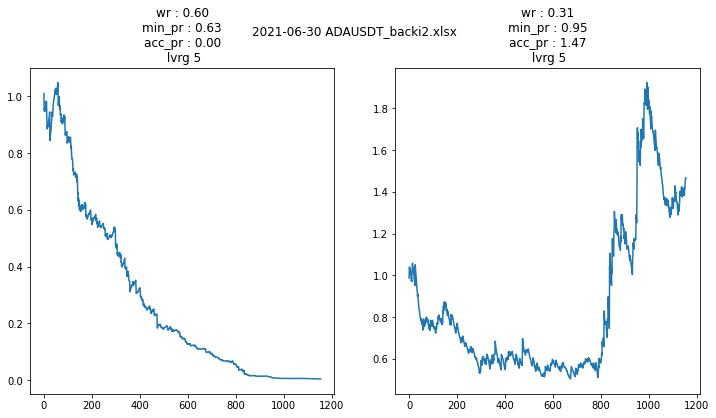

2021-06-30 ETCUSDT_backi2.xlsx loaded !


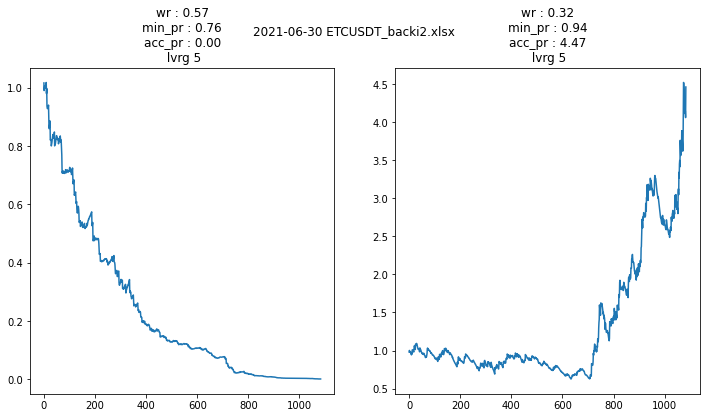

2021-06-30 LTCUSDT_backi2.xlsx loaded !


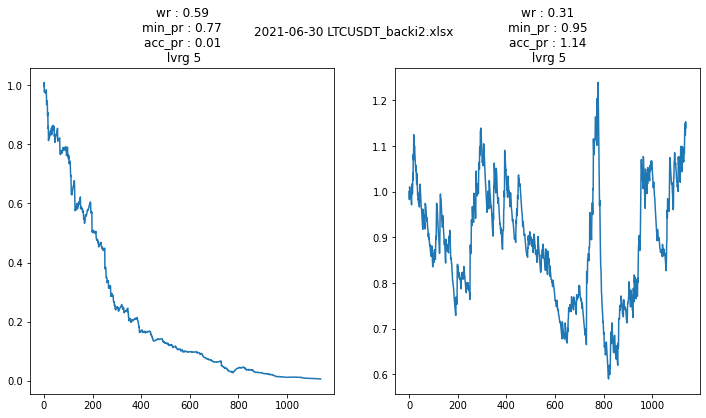

2021-06-30 EOSUSDT_backi2.xlsx loaded !


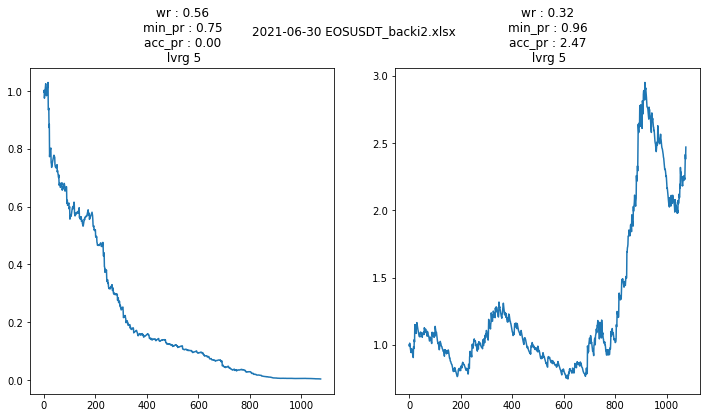

2021-06-30 BCHUSDT_backi2.xlsx loaded !


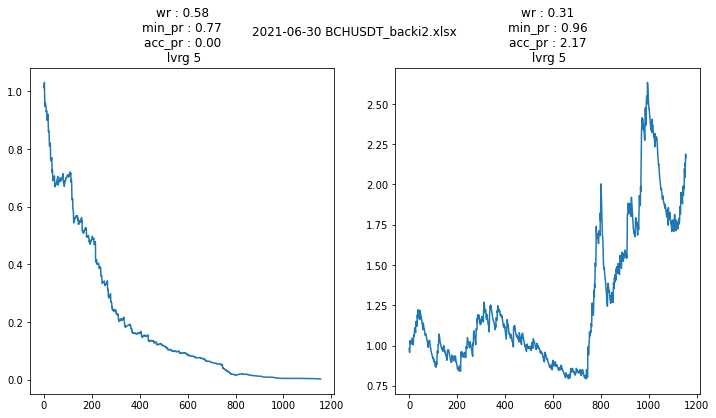

2021-06-30 XLMUSDT_backi2.xlsx loaded !


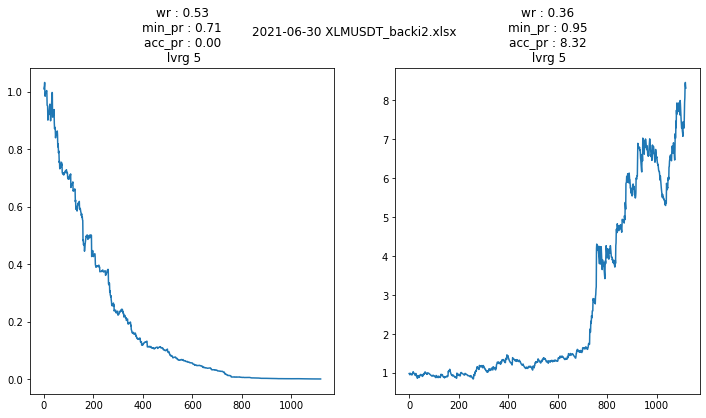

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  # # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      ep_2touch = False

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):
          
          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= upper_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            if ep_2touch:

              trade_list.append([i, j])
              temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
              pr_list.append(temp_pr)

            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= lower_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          
            if ep_2touch:
              trade_list.append([i, j])
              temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
              pr_list.append(temp_pr)

            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### ep close

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  # # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = res_df['close'].iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / res_df['close'].iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp shift(1)

2021-06-30 XLMUSDT_backi2.xlsx loaded !


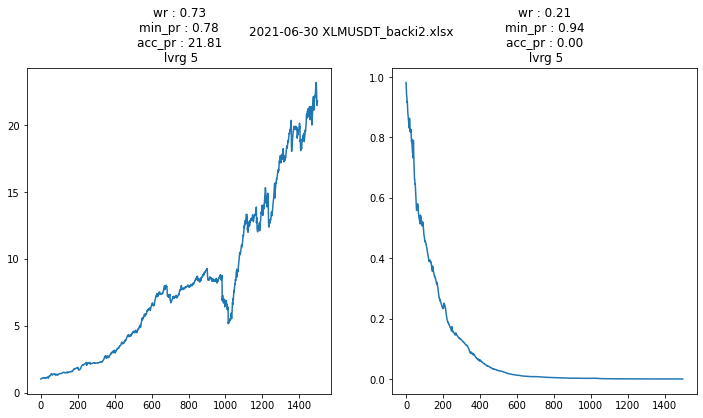

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j - 1] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          # if res_df['high'].iloc[j] >= long_tp.iloc[j] >= res_df['low'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j - 1] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp 2 case

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] < short_tp.iloc[j]:

              tp = short_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("open")

            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:

              # tp = short_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
            if res_df['open'].iloc[j] >= long_tp.iloc[j]:

              tp = long_tp.iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("open")

            
            #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
            else:
              
              # tp = long_tp.iloc[j]
              tp = res_df['open'].iloc[j]
              tp_state_list.append("long_tp")

            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp 2 case non_inversion

2021-06-30 XLMUSDT_backi2.xlsx loaded !


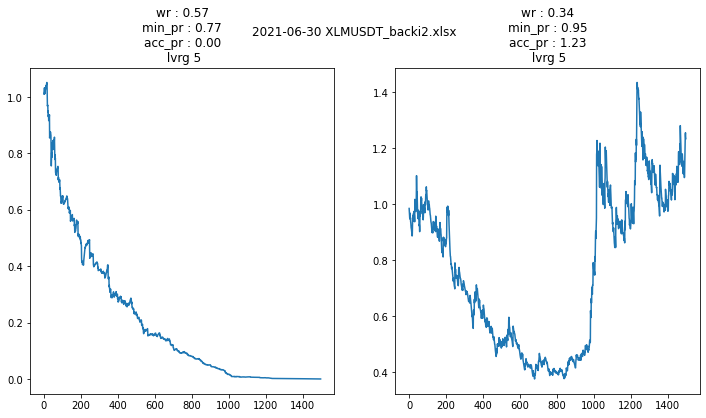

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp 2 case inversion

2021-06-30 XLMUSDT_backi2.xlsx loaded !


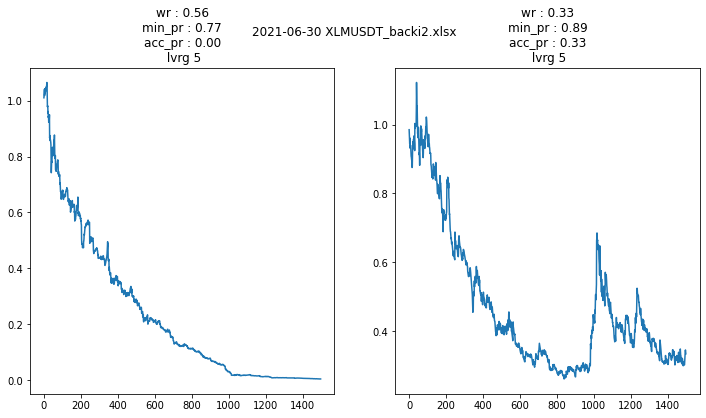

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                # tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp = res_df['close'].iloc[j]
                tp_state_list.append("short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                # tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp = res_df['close'].iloc[j]
                tp_state_list.append("short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                # tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp = res_df['close'].iloc[j]
                tp_state_list.append("long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                # tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp = res_df['close'].iloc[j]
                tp_state_list.append("long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp open

2021-06-30 XLMUSDT_backi2.xlsx loaded !


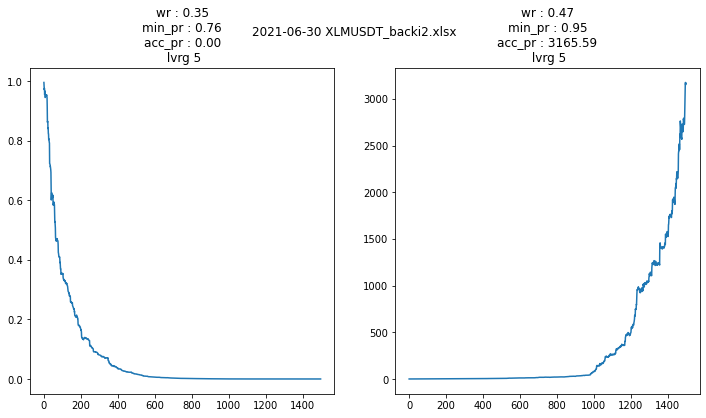

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / res_df['open'].iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          # if res_df['high'].iloc[j] >= long_tp.iloc[j] >= res_df['low'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = res_df['open'].iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp sell high, buy low

2021-06-30 XLMUSDT_backi2.xlsx loaded !


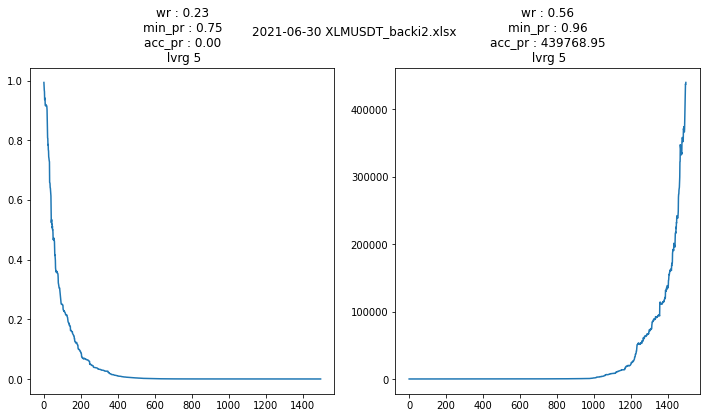

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / res_df['high'].iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          # if res_df['high'].iloc[j] >= long_tp.iloc[j] >= res_df['low'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = res_df['low'].iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp close shift(1)

2021-06-30 XLMUSDT_backi2.xlsx loaded !


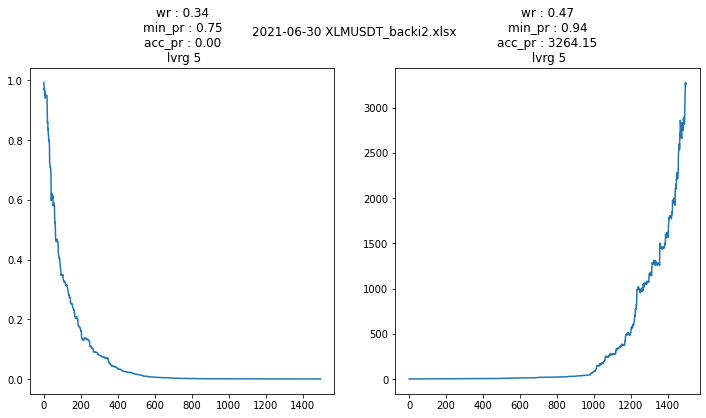

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / res_df['close'].iloc[j - 1] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = res_df['close'].iloc[j - 1] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp close

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  # # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / res_df['close'].iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = res_df['close'].iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### tp 2 touch

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):
    
      tp_2touch = 0

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]:

            tp_2touch += 1

          if tp_2touch >= 2:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j] >= res_df['low'].iloc[j]:

            tp_2touch += 1

          if tp_2touch >= 2:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

###### max tp

2021-06-30 XLMUSDT_backi2.xlsx loaded !


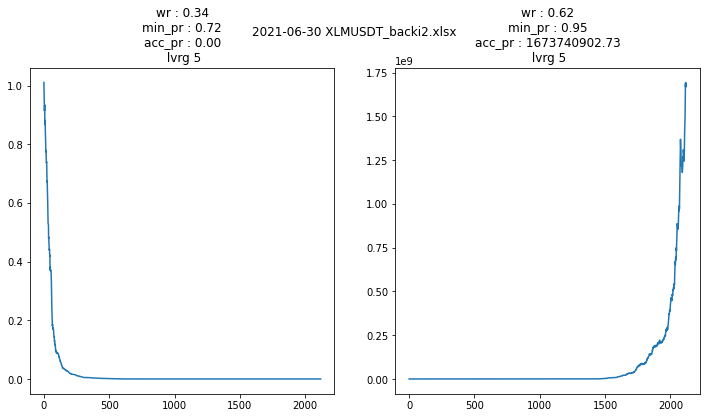

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "xlm".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)

  max_upper = np.max(res_df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1) * (1 - gap)
  min_lower = np.min(res_df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1) * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

          #     max tp    #
          #     color off st 중, min 을 max tp 로 정함    # <-- 이거 고민좀 해봐야함..
          #     1. 단순, max upper st 기준으로 max tp 적용하면,   #
          if res_df['high'].iloc[j] >= max_upper.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / max_upper.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break

          #     max tp    #
          #     color off st 중, min 을 max tp 로 정함    # <-- 이거 고민좀 해봐야함..
          #     1. 단순, max upper st 기준으로 max tp 적용하면,   #
          if res_df['low'].iloc[j] >= min_lower.iloc[j] >= res_df['high'].iloc[j]:

            trade_list.append([i, j])
            temp_pr = min_lower.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

##### ep 1 touch

2021-06-30 LINKUSDT_backi2.xlsx loaded !


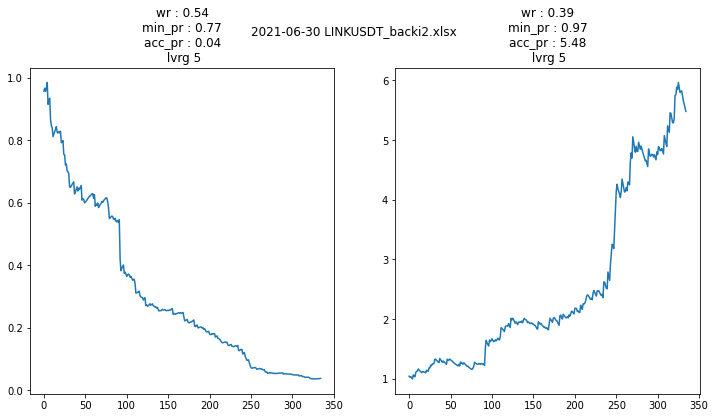

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  if "link".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
                    # (res_df[macd_hist].shift(shift_size) > 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
                    # (res_df[macd_hist].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

##### ep 2 touch

2021-06-30 ETHUSDT_backi2.xlsx loaded !


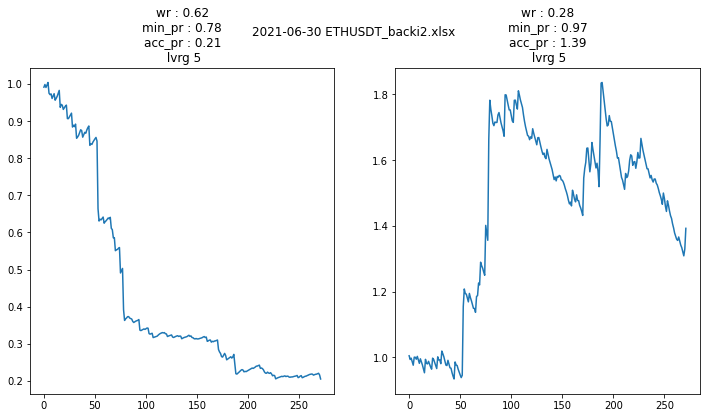

2021-06-30 BTCUSDT_backi2.xlsx loaded !


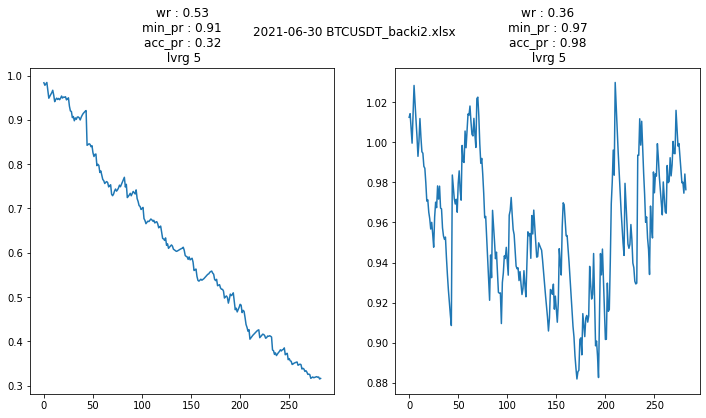

2021-06-30 XRPUSDT_backi2.xlsx loaded !


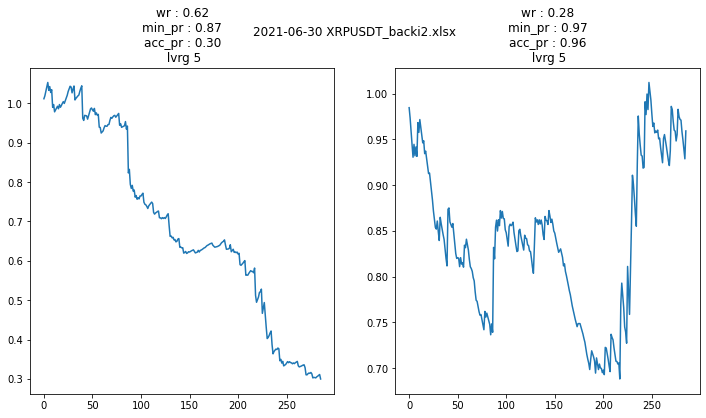

2021-06-30 LINKUSDT_backi2.xlsx loaded !


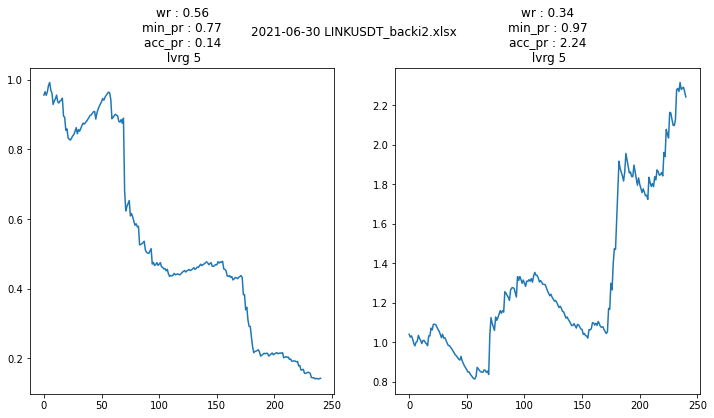

2021-06-30 ADAUSDT_backi2.xlsx loaded !


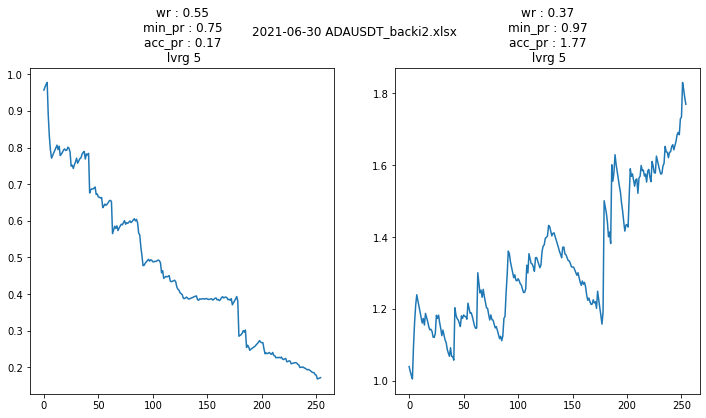

2021-06-30 ETCUSDT_backi2.xlsx loaded !


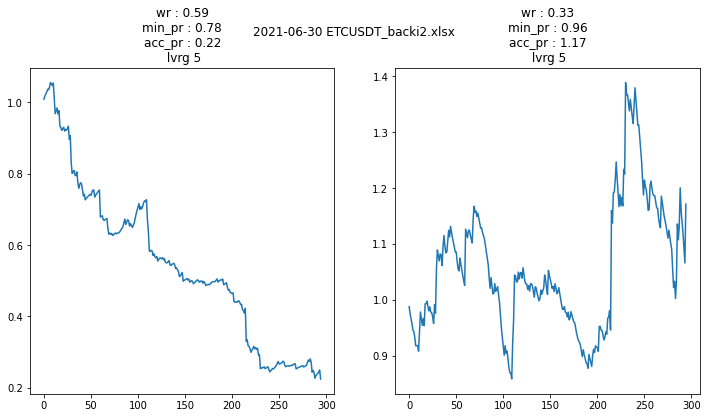

2021-06-30 LTCUSDT_backi2.xlsx loaded !


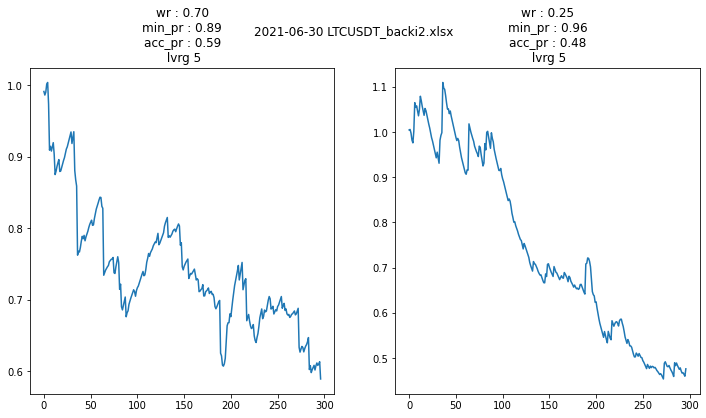

2021-06-30 EOSUSDT_backi2.xlsx loaded !


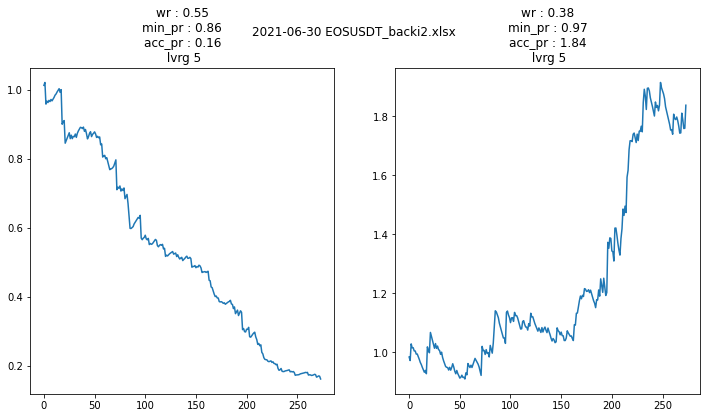

2021-06-30 BCHUSDT_backi2.xlsx loaded !


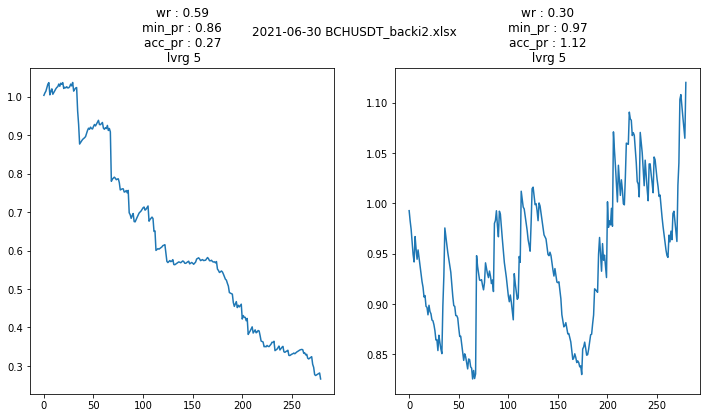

2021-06-30 XLMUSDT_backi2.xlsx loaded !


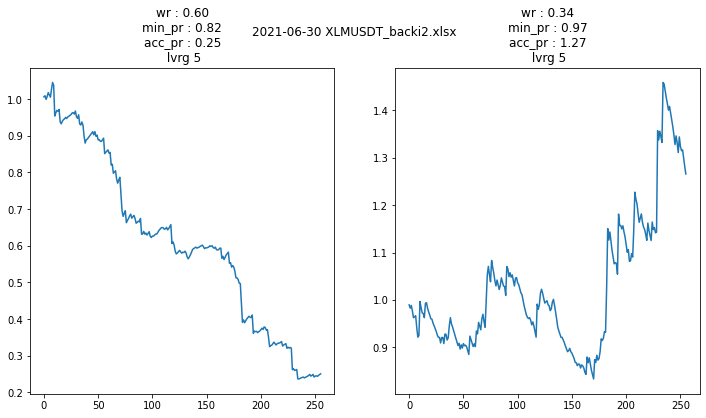

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      ep_2touch = False

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):
          
          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= upper_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            if ep_2touch:

              trade_list.append([i, j])
              temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
              pr_list.append(temp_pr)

            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= lower_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          
            if ep_2touch:
              trade_list.append([i, j])
              temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
              pr_list.append(temp_pr)

            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    #     result analysis     #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

##### close entry

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for macd_hist in macd_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[macd_hist].shift(shift_size) < 0), -1, 0)  
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    
    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      ep_2touch = False

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):
          
          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= upper_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            if ep_2touch:

              trade_list.append([i, j])
              temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
              pr_list.append(temp_pr)

            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #       ep 2 touch      #
          if res_df['high'].iloc[j] >= lower_ep.iloc[i] >= res_df['low'].iloc[j]:
            ep_2touch = True

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:
          
            if ep_2touch:
              trade_list.append([i, j])
              temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
              pr_list.append(temp_pr)

            i = j
            break


      i += 1
      if i >= len(res_df):
        break



    #     result analysis     #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

#### trix

2021-06-30 ETHUSDT_trix_backi2.xlsx loaded !


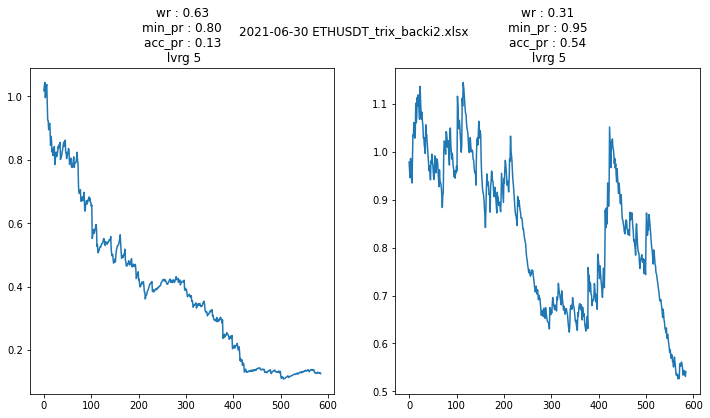

In [ ]:
fee = 0.0004
lvrg = 5

shift_size = 1
# shift_size = 0

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']


save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "xlm".upper() not in key:
  if "eth".upper() not in key:
  # if "link".upper() not in key:
    continue

  if "trix_backi2" not in key:
    continue

  # try:
  #   res_df
  # except:
  #   res_df = pd.read_excel(save_path + key, index_col=0)

  # res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)


  for trix in trix_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[macd_hist].shift(shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[macd_hist].shift(shift_size) > 0), 1, entry)   
    
    #       trix.shift(1) > 0, trix.shift(2) > trix.shift(1)      #
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[trix].shift(shift_size + 1) < res_df[trix].shift(shift_size)) &
                    (res_df[trix].shift(shift_size + 1) > res_df[trix].shift(shift_size)) &
                    (res_df[trix].shift(shift_size) > 0), -1, 0)  
     
    #       trix.shift(1) < 0, trix.shift(2) < trix.shift(1)      #
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[trix].shift(shift_size + 1) > res_df[trix].shift(shift_size)) &                     
                    (res_df[trix].shift(shift_size + 1) < res_df[trix].shift(shift_size)) &                     
                    (res_df[trix].shift(shift_size) < 0), 1, entry)   
                    # (res_df[trix].shift(shift_size) < 0), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)

    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break


    # -------------------- result analysis -------------------- #
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #    
    
    


#### sar

##### shift(0)

2021-06-30 ETHUSDT_backi2.xlsx loaded !


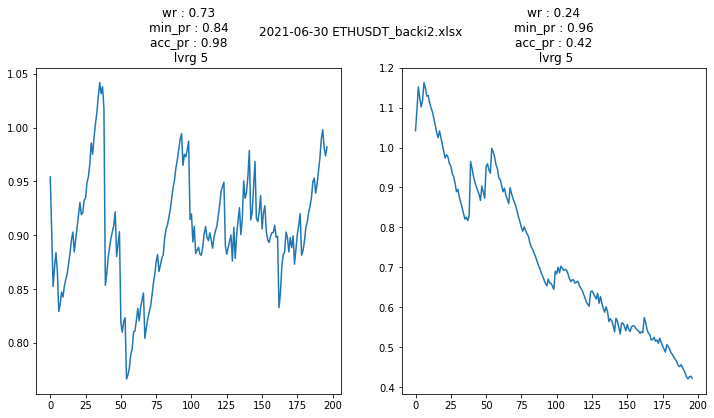

In [ ]:
fee = 0.0004
lvrg = 5

sar_shift_size = 0
# sar_shift_size = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']

save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  if "eth".upper() not in key:
    continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)

  for sar in sar_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[sar].shift(sar_shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[sar].shift(sar_shift_size) > 0), 1, entry)   
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    (res_df[sar].shift(sar_shift_size) > upper_ep), -1, 0)   
                    # (res_df[sar].shift(sar_shift_size) < upper_ep), -1, 0)   
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    (res_df[sar].shift(sar_shift_size) < lower_ep), 1, entry)   
                    # (res_df[sar].shift(sar_shift_size) > lower_ep), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)

    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #
    trade_list = []
    pr_list = []
    ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:
          # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

            #         dynamic tp        #
            if short_tp.iloc[j] != short_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                # tp = short_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-short_tp")

            #         static tp         #
            else:
              
              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] < short_tp.iloc[j]:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:

                tp = short_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-short_tp")

            temp_pr = upper_ep.iloc[i] / tp - fee
            ep_tp_list.append((upper_ep.iloc[i], tp))                          
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          #     1. 결과적으로는 tp 를 넘었는데    #
          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            #         dynamic tp        #
            if long_tp.iloc[j] != long_tp.iloc[j - 1]:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                # tp = long_tp.iloc[j]
                tp = res_df['open'].iloc[j]
                tp_state_list.append("d-open")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("d-long_tp")

            #         static tp         #
            else:

              #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
              #   non_inversion 의 경우, short_tp 가 가능함   #

              if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")

              
              #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
              else:
                
                tp = long_tp.iloc[j]
                # tp = res_df['open'].iloc[j]
                tp_state_list.append("s-long_tp")


            temp_pr = tp / lower_ep.iloc[i] - fee
            ep_tp_list.append((lower_ep.iloc[i], tp))
            trade_list.append([i, j])
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break


    #     result analysis     #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

##### inversion

In [ ]:
fee = 0.0004
lvrg = 5

sar_shift_size = 0
sar_shift_size = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002

sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']

save_path = './candlestick_concated/res_df/'
res_df_list = os.listdir(save_path)

for key in res_df_list:

  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  #   continue

  if "backi2" not in key:
    continue


  res_df = pd.read_excel(save_path + key, index_col=0)

  print(key, "loaded !")

  
  upper_ep = res_df['min_upper'] * (1 - gap)
  lower_ep = res_df['max_lower'] * (1 + gap)

  for sar in sar_list:

    #       1-1. entry condition = ep line touch + all color off 는 제외      #
    #       short = -1     #
    # entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
    #                                                     (res_df['minor_ST2_Trend'] == 1) & 
    #                                                   (res_df['minor_ST3_Trend'] == 1)) &
    #                 (res_df[sar].shift(sar_shift_size) < 0), -1, 0)   
    # #       long = 1     #
    # entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
    #                                                     (res_df['minor_ST2_Trend'] == -1) & 
    #                                                   (res_df['minor_ST3_Trend'] == -1)) &
    #                 (res_df[sar].shift(sar_shift_size) > 0), 1, entry)   
    
    entry = np.where((res_df['high'] >= upper_ep) & (upper_ep >= res_df['low']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                    (res_df['minor_ST2_Trend'] == 1) & 
                    (res_df['minor_ST3_Trend'] == 1)) &
                    # (res_df[sar].shift(sar_shift_size) > upper_ep), -1, 0)   
                    (res_df[sar].shift(sar_shift_size) < upper_ep), -1, 0)   
    #       long = 1     #
    entry = np.where((res_df['low'] <= lower_ep) & (lower_ep <= res_df['high']) & 
                    np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                    (res_df['minor_ST2_Trend'] == -1) & 
                    (res_df['minor_ST3_Trend'] == -1)) &
                    # (res_df[sar].shift(sar_shift_size) < lower_ep), 1, entry)   
                    (res_df[sar].shift(sar_shift_size) > lower_ep), 1, entry)   


    #       1-2. tp line = middle line 조금 이내         #
    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)

    short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


    #       trading       #

    trade_list = []
    pr_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):

      if entry[i] == -1:

        for j in range(i + 1, len(res_df)):

          if res_df['low'].iloc[j] <= short_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
            pr_list.append(temp_pr)
            i = j
            break

      elif entry[i] == 1:

        for j in range(i + 1, len(res_df)):

          if res_df['high'].iloc[j] >= long_tp.iloc[j]:

            trade_list.append([i, j])
            temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
            pr_list.append(temp_pr)
            i = j
            break


      i += 1
      if i >= len(res_df):
        break


    #     result analysis     #
    plt.figure(figsize=(12, 6))
    plt.suptitle(key)

    np_pr = (np.array(pr_list) - 1) * lvrg + 1

    total_pr = np.cumprod(np_pr)
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    plt.subplot(121)
    plt.plot(total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # plt.show()


    #     reversion adjustment      #
    rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    rev_total_pr = np.cumprod(rev_np_pr)
    rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    plt.subplot(122)
    plt.plot(rev_total_pr)
    plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    plt.show()

    break

    #   ------------------------------------------------  #

    #       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

    #       2-1. sl exit condition = [???]       #

#### half tp

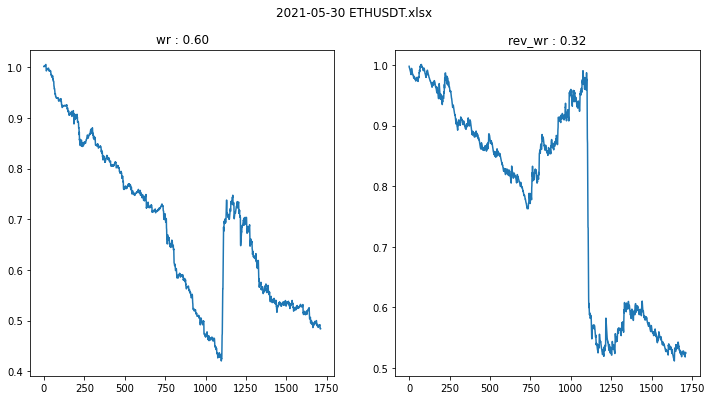

In [ ]:
fee = 0.0004
lvrg = 1

#       1-0. ep line = color on st min/max 조금 이내       #
#       1-0-1. option1. color on upper st 색출 
# -->   1-0-1. option2. min upper st 바로 추출
#       1-0-2. 색출된 st 중 min / max st 선별
gap = 0.0002
upper_ep = res_df['min_upper'] * (1 - gap)
lower_ep = res_df['max_lower'] * (1 + gap)

#       1-1. entry condition = ep line touch + all color off 는 제외      #
#       short = -1     #
entry = np.where((res_df['high'] >= upper_ep) & np.logical_not((res_df['minor_ST1_Trend'] == 1) & 
                                                    (res_df['minor_ST2_Trend'] == 1) & 
                                                  (res_df['minor_ST3_Trend'] == 1)), -1, 0)   
#       long = 1     #
entry = np.where((res_df['low'] <= lower_ep) & np.logical_not((res_df['minor_ST1_Trend'] == -1) & 
                                                    (res_df['minor_ST2_Trend'] == -1) & 
                                                  (res_df['minor_ST3_Trend'] == -1)), 1, entry)   

#       1-2. tp line = middle line 조금 이내         #
short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2


#       trading       #

trade_list = []
pr_list = []

i = 0
while 1:
# for i in range(len(res_df)):

  if entry[i] == -1:

    for j in range(i + 1, len(res_df)):

      if res_df['low'].iloc[j] <= short_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = upper_ep.iloc[i] / short_tp.iloc[j] - fee
        pr_list.append(temp_pr)
        i = j
        break

  elif entry[i] == 1:

    for j in range(i + 1, len(res_df)):

      if res_df['high'].iloc[j] >= long_tp.iloc[j]:

        trade_list.append([i, j])
        temp_pr = long_tp.iloc[j] / lower_ep.iloc[i] - fee
        pr_list.append(temp_pr)
        i = j
        break


  i += 1
  if i >= len(res_df):
    break



#     result analysis     #
plt.figure(figsize=(12, 6))
plt.suptitle(key)

np_pr = (np.array(pr_list) - 1) * lvrg + 1

total_pr = np.cumprod(np_pr)
wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

plt.subplot(121)
plt.plot(total_pr)
plt.title("wr : %.2f" % wr)
# plt.show()


#     reversion adjustment      #
rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
    
rev_total_pr = np.cumprod(rev_np_pr)
rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

plt.subplot(122)
plt.plot(rev_total_pr)
plt.title("rev_wr : %.2f" % rev_wr)
plt.show()

#   ------------------------------------------------  #

#       2. sl condition = multi sar 이 반대에 있지 않은 경우         #

#       2-1. sl exit condition = [???]       #


### traded section plot

#### plot with off-color st with dash

##### plot all indicator (stepline ver.)

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

if inversion:
  plot_pr_list = rev_np_pr
else:
  plot_pr_list = np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']

# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i != 257:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue


  # if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # middle

  plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize)  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac


  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  
  # # plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17], # ichimoku
  # #                   where=plot_df.values[:, 16] >= plot_df.values[:, 17], facecolor='g', alpha=0.3) # ichimoku
  # # plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17],
  # #                   where=plot_df.values[:, 16] <= plot_df.values[:, 17], facecolor='r', alpha=0.3)
  
  # # ------------------------------------------------------------- #

  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(ep_tp_list[t_i][1], linestyle='-')  # tp line axhline
  plt.title("%s ~ %s -> %.5f\n %s" % (i, j, plot_pr_list[t_i], tp_state_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


Output hidden; open in https://colab.research.google.com to view.

##### specific plot v1

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

if inversion:
  plot_pr_list = rev_np_pr
else:
  plot_pr_list = np_pr



#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
# ichimoku_cols = [22, 23]  # 20 ~ 29
ichimoku_cols2 = [22, 23]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i != 257:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue


  if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  fig = plt.figure(figsize=(12, 16))
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  ax = fig.add_subplot(211)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle
  
  plt.plot(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.plot(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  # plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.plot(plot_upper_middle.values, alpha=1, linestyle='--')  # middle
  plt.plot(plot_lower_middle.values, alpha=1, linestyle='--')  # middle

  plt.plot(plot_short_tp.values, alpha=1, linestyle=':')  # tp
  plt.plot(plot_long_tp.values, alpha=1, linestyle=':')  # tp

  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14], # ichimoku
                    where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)  
  
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17], # ichimoku
                    where=plot_df.values[:, 16] >= plot_df.values[:, 17], facecolor='g', alpha=0.3) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17],
                    where=plot_df.values[:, 16] <= plot_df.values[:, 17], facecolor='r', alpha=0.3)

  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(ep_tp_list[t_i][1], linestyle='-')  # tp line axhline
  plt.title("%s ~ %s -> %.5f\n %s" % (i, j, plot_pr_list[t_i], tp_state_list[t_i]))


  plt.subplot(212)
  plt.plot(plot_df.values[:, [15]], 'g', alpha=1)  # middle
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(0, linestyle='--')

  plt.show()
  # plt.draw()
  plt.close()
  print()



KeyError: ignored

##### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


#### none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()